## Integral assignment - Technical prototype - Koen van Schaik, Chrisje Ganzevoort & Hanna van Woerden
At Sensorlab in Utrecht we measured our heart rate and Galvanice Skin Response (GSR) while watching different videos. <br/><br/>The videos were divided into 4 different emotions:
1. Boring (watching paint dry)
2. Negative (seeing a kid get bullied and kicked)
3. Interesting (watching a interesting video about smart cities)
4. Positive (watching a cabaret video)

Next these 4 different emotions, we measured a baseline measurement to see if there is a difference between the baseline measurement and different emotions. 

In this notebook, the data will be analysed and described. Based on the findings we will draw a conclusion. 

## Analysis

In [386]:
#Import needed libraries
import pandas as pd
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#Make the plots have a grid background instead of a white background. This makes it easier to interpret the graphs.
sns.set()


In [387]:
#Make a list variable containing all the .csv files in the specific folder
files = glob.glob('*.csv')

#Create a dataFrame with all the .csv files combined
df = pd.concat([pd.read_csv(f).assign(New=os.path.basename(f)) for f in files], ignore_index = True, sort= True)

files

['Baseline - Hanna.csv',
 'Baseline - Koen.csv',
 'Boring - Hanna.csv',
 'Boring - Koen.csv',
 'Interesting - Hanna.csv',
 'Interesting - Koen.csv',
 'Negative - Hanna.csv',
 'Negative - Koen.csv',
 'Positive - Hanna.csv',
 'Positive - Koen.csv']

In [388]:
#Show the head of the DataFrame 
df.head()

,New,sensor_1,sensor_2,sensor_3,timestamp
0,Baseline - Hanna.csv,0.515152,0.506354,0,1546965516930
1,Baseline - Hanna.csv,0.515152,0.501466,0,1546965517043
2,Baseline - Hanna.csv,0.515152,0.481916,0,1546965517153
3,Baseline - Hanna.csv,0.514174,0.495601,0,1546965517260
4,Baseline - Hanna.csv,0.514174,0.512219,0,1546965517368


## Renaming the columns

In the code below we create new columns in the DataFrame. One column with the person and one column with the Emotion. Based on these new columns, we can plot the persons and the emotions and compare them indidually.

In [389]:
#Create a new series, existing of the first part of the 'new' series after the split on the space. 
df['Emotion'] = df['New'].apply(lambda x: x.split(' ')[0])

df['Person'] = df['New'].apply(lambda x: x.split(' ')[2])

df['Person'] = df['Person'].apply(lambda x: x.split('.')[0])

In [390]:
#Rename the sensors. Sensor_1 becomes the Heart rate, sensor_2 becomes the GSR, New becomes the file name. 
df = df.rename(columns={'sensor_1': 'Heart rate', 'sensor_2': 'GSR', 'New' : 'Filename'})

## Plotting the Heart rate and GSR against the Person and Emotion

We want to know if there are differences in heart rate or GSR between the different persons or emotions. To visualize this, we created different violin plots. 

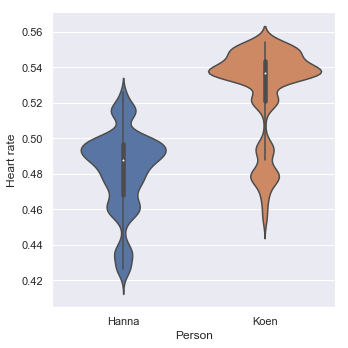

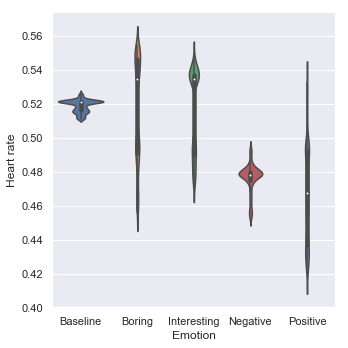

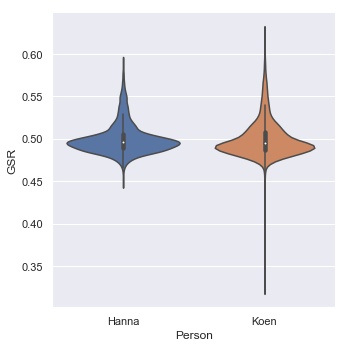

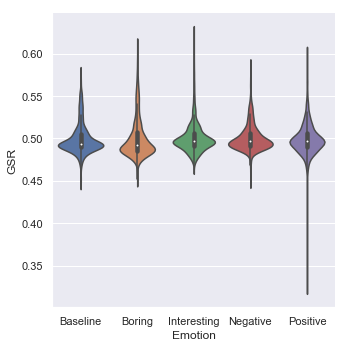

In [391]:
#Create a violin plot. THe X contains the Emotion or person and the Y contains the Heart rate or GSR data.
sns.catplot(x="Person", y="Heart rate", kind="violin", data=df)
sns.catplot(x="Emotion", y="Heart rate", kind="violin", data=df)
sns.catplot(x="Person", y="GSR", kind="violin", data=df)
sns.catplot(x="Emotion", y="GSR", kind="violin", data=df)

## Explaining the plots

Plot 1 (Heart rate vs. Person): We can see that Koen's pulses of the heart rate are higher than Hanna's. This does not certainly mean anything. This can be because of the heart rate sensor's sensitivity. The heart rate is not higher, the pulses are. 

Plot 2 (Heart rate vs. Emotion): We can see that the pulses in heart rate differ very much from each other. This can be because of Koen's pulses are higher as we found out in the previous plot. Because of this findings, it is important to plot the person's heart rate and GSR individually from each other. This means that we will take a look at Koen's heart rate seperately from Hanna's heart rate.

Plot 3 (GSR vs. Person): As we can see, the GSR pulses in Koen's data have very different high and low values than Hanna's. This can be because of the outliers are plotted. Even though these might be outliers, we would like to keep them in the dataset to maintain all original data.

Plot 4 (GSR vs. Emotion): An interesting thing we can notice in this plot, is that the positive emotion's lowest values are the ones which were the lowest of all plots. The GSR numbers stand for the resistance. The lower the resistance is, the more you sweat, because the sweat is conducting the pulses. 

## Conslusion based on the plots:

The Positive GSR data shows that there is a difference in conduction. We can hypothesise that positive emotions result in more sweat. This is a very interesting given for our product, because we want to give a study advice base of biofeedback. 

Another conclusion is that we have to look into the data of Koen and Hanna seperately, because the have different biofeedback as we can see in the plots. This means we will create seperate DataFrames of an individual person and emotions so we can take a more in depth look in the different datasets.


In [392]:
#Below, we create different DataFrames, based on the different .csv files.

df1 = pd.read_csv('Boring - Hanna.csv')
df2 = pd.read_csv('Boring - Koen.csv')
df3 = pd.read_csv('Interesting - Hanna.csv')
df4 = pd.read_csv('Interesting - Koen.csv')
df5 = pd.read_csv('Negative - Hanna.csv')
df6 = pd.read_csv('Negative - Koen.csv')
df7 = pd.read_csv('Positive - Hanna.csv')
df8 = pd.read_csv('Positive - Koen.csv')
df9 = pd.read_csv('Baseline - Hanna.csv')
df10 = pd.read_csv('Baseline - Koen.csv')

__Using for loops__ <br/>
By using for- loops we can save alot of time by not writing code for each individual DataFrame. We create different lists; one which contains all Dataframes, one which contains Hanna's DataFrames and one which contains Koen's DataFrames.

In [393]:
#Below we create a list, containing all DataFrames.
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

#Create a list which contains Koen's DataFrames
dfs_koen = [df2, df4, df6, df8, df10]

#Create a list which contains Hanna's DataFrames
dfs_hanna = [df1, df3, df5, df7, df9]

The timestamp in the DataFrames is not easily interpretable yet. The timestamp has to be divided by 1000 so we get the seconds. We found this by using a converter (https://www.unixtimestamp.com/index.php) and put in the timestamp. By removing some of the last numbers of the timestamp, we found out we had to delete the three last numbers. We can get the right timestamp by dividing it by 1000.



In [394]:
#Import time to work with time. Datatime is already imported the first lines of the code where more libraries are imported.
import time

#We want to 
for item in dfs:
    item.rename(columns={'sensor_1': 'Heart rate', 'sensor_2': 'GSR'}, inplace = True)
    item.drop('sensor_3', axis = 1, inplace = True)
    item['Date time'] = item['timestamp'].div(1000).round(0)
    item['Date time'] = pd.to_datetime(item['Date time'], unit='s')
    item['New timestamp (/1000)'] = item['timestamp'] / 1000

df2.head()

,timestamp,Heart rate,GSR,Date time,New timestamp (/1000)
0,1546964009540,0.536657,0.495601,2019-01-08 16:13:30,1.546964e+09
1,1546964009655,0.536657,0.484848,2019-01-08 16:13:30,1.546964e+09
2,1546964009763,0.536657,0.482893,2019-01-08 16:13:30,1.546964e+09
3,1546964009870,0.536657,0.483871,2019-01-08 16:13:30,1.546964e+09
4,1546964009979,0.536657,0.483871,2019-01-08 16:13:30,1.546964e+09


## Explanation heart rate Hanna

Here Hanna's heart rate is plotted. By using a for loop and the find_peaks functy, all the DataFrames in the list of dfs_hanna are plotted without typing the code over and over again. 
Every step is explained what and why we execute a certain step. 

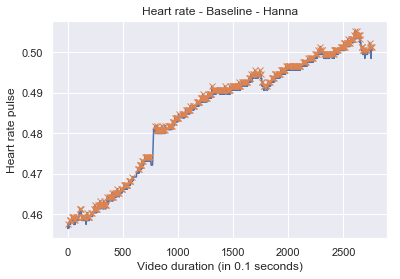

The amount of peaks is: 386
The duration is: 303 seconds
The heart rate (bpm) is: 76


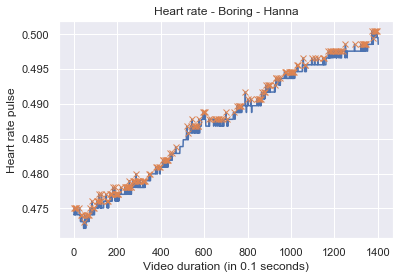

The amount of peaks is: 168
The duration is: 153 seconds
The heart rate (bpm) is: 65


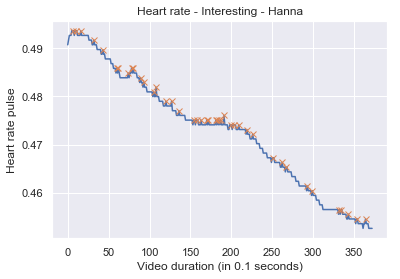

The amount of peaks is: 42
The duration is: 41 seconds
The heart rate (bpm) is: 61


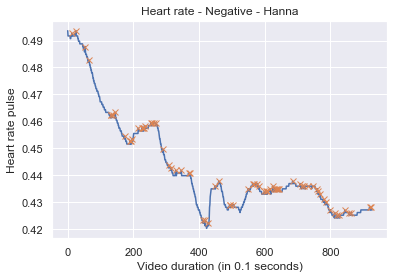

The amount of peaks is: 71
The duration is: 101 seconds
The heart rate (bpm) is: 42


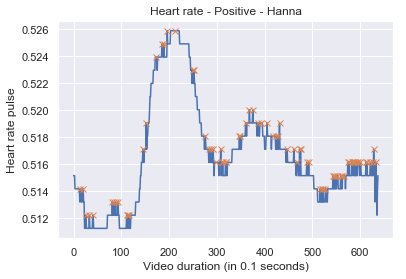

The amount of peaks is: 76
The duration is: 70 seconds
The heart rate (bpm) is: 65


In [395]:
from scipy.signal import find_peaks

#Here we create a list where we store all the peaks from the heart rate. We do this so we can later plot a line of all the peaks instead of the peaks on top of the heart rate plot. 
#We define a list for Hanna and Koen seperately.
peaks_list_hanna = []

#Here we create an index to loop through the files list. In this file every even number is hanna's Dataframe. This way we can generate a Title for the plot automatically. (See the plt.title line in the loop below.)
index_files = 0

#Every item in dfs_hanna is a DataFrame containing all the data from Hanna with different emotions. 
for item in dfs_hanna:
    #x is the data of the heart rate series of the item(the DataFrame based on the for- loop)
    x = item['Heart rate']
    #item['x'] = item['Heart rate']
    #Here we use the find_peaks function to find the peaks. The height is being set to 0.4 because all of the heart rate data has no pulse below 0.4. 
    #The distance is set to 1, because after trying different distances, this came out working best. This is based on the calculation of the heart rate which should be above at least 40 for every plot.
    peaks, _ = find_peaks(x, height=0.4, distance = 1)
    
    #plot x
    plt.plot(x)
    #plot the peaks
    plt.plot(peaks, x[peaks], "x", label = item)
    #Because we do not define plt.subplots(), the plots are plotted on top of each other. This way we can see if the peaks are right and do not skip certain points in the plot. This way we know the settings are right.
    plt.title('Heart rate - ' + files[index_files].split('.')[0])
    plt.xlabel('Video duration (in 0.1 seconds)')
    plt.ylabel('Heart rate pulse')
    plt.show()
    
    #Print the amount of peaks
    print("The amount of peaks is: " + str(len(peaks)))
    
    #Define variables for the beginning and ending of the 'Date time' series. 
    #[0] = the first row
    #[-1] = the last row
    beginning = item['Date time'][0]
    end = item.iloc[-1]['Date time']

        #Duration = the last 'Date time' value minus the first 'Date time value'
    duration = end - beginning
    
    #Convert the duration into seconds
    duration = int(duration.total_seconds())
        
    #Heart rate is calculating by dividing the amount of peaks by the duration and multiplying this by 60 (because 60 is the amount of seconds in a minute)
    heartrate =  len(peaks) / duration* 60
    heartrate = int(heartrate)
    
    print("The duration is: " + str(duration) + ' seconds')
    print(f'The heart rate (bpm) is: {heartrate}')
    
    #Because we want to plot the peaks individually, we have to add the list with peaks to the peaks_list_hanna. 
    peaks = peaks.tolist()
    peaks_list_hanna.append(peaks)
    
    #Add 2 to the index_files, so the title of the plot will be the right one (the one after the next).
    index_files = index_files + 2
    
    

### Conslusion Hanna's heart rate

It is difficult to say something about the shape of the plots. Every plot has different pulses and different shapes. We assume that this is because of the sensitivity of the heart rate sensor. Since the sensor which is used is not very high quality, it is difficult to say something about the plots above on its own. 

We will take a look at the course of the peaks later in this file, so we might see some interesting things happening in the heart rate peaks data.



## Explanation heart rate Koen
Below the heart rate of Koen is plotted. For the explanation of all the steps, please look at the for- loop above, since all the steps are the same but only the person differs.

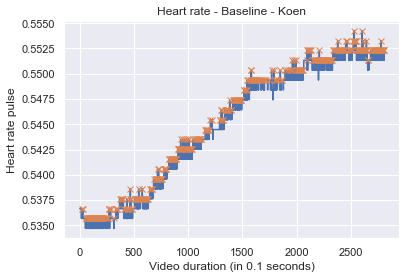

The amount of peaks is: 407
The duration is: 308 seconds
The heart rate (bpm) is: 79


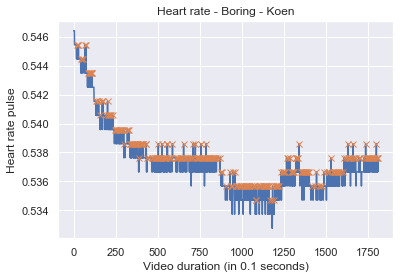

The amount of peaks is: 284
The duration is: 198 seconds
The heart rate (bpm) is: 86


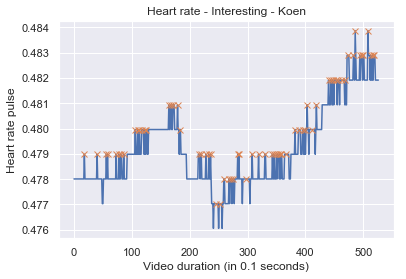

The amount of peaks is: 67
The duration is: 58 seconds
The heart rate (bpm) is: 69


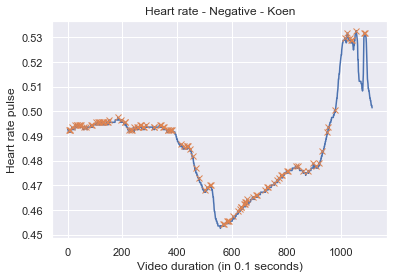

The amount of peaks is: 110
The duration is: 122 seconds
The heart rate (bpm) is: 54


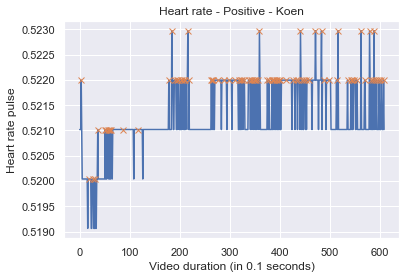

The amount of peaks is: 83
The duration is: 66 seconds
The heart rate (bpm) is: 75


In [396]:
peaks_list_koen = []

index_files = 1

for item in dfs_koen:
    x = item['Heart rate']
    item['x'] = item['Heart rate']
    peaks, _ = find_peaks(x, height=0.4, distance = 1)
    
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x", label = item)
    plt.title('Heart rate - ' + files[index_files].split('.')[0])
    plt.xlabel('Video duration (in 0.1 seconds)')
    plt.ylabel('Heart rate pulse')
    plt.show()
    print("The amount of peaks is: " + str(len(peaks)))
    
    #plt.plot(peaks,   label = item)
    beginning = item['Date time'][0]
    end = item.iloc[-1]['Date time']

    duration = end - beginning
    duration = int(duration.total_seconds())
    
    heartrate =  len(peaks) / duration* 60
    heartrate = int(heartrate)
    print("The duration is: " + str(duration) + ' seconds')
    print(f'The heart rate (bpm) is: {heartrate}')
    peaks = peaks.tolist()
    peaks_list_koen.append(peaks)
    
    index_files = index_files + 2

### Conslusion heart rate plots

In Koen's plots, the same is happening as was happening at Hanna's plots. The shape does not tell much about the data, so we will look at the course/development of the peaks later in this file. 

In [397]:
#Here we transform the peaks_list_hanna list into a DataFrame.
peaks_list_hanna = pd.DataFrame(peaks_list_hanna)

#Here we transpose the DataFrame, so the columns and rows are switched.
peaks_list_hanna = peaks_list_hanna.transpose()


#Here we repeat the same steps for Koen's list
peaks_list_koen = pd.DataFrame(peaks_list_koen)
peaks_list_koen = peaks_list_koen.transpose()


## Plotting the peaks

In the code below, the peaks from Hanna's file will be plotted. This way we can compare the emotions with the baseline mearsurement so we can conclude if there is a difference or not.

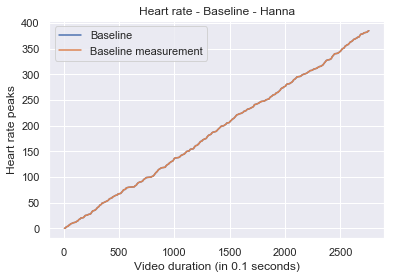

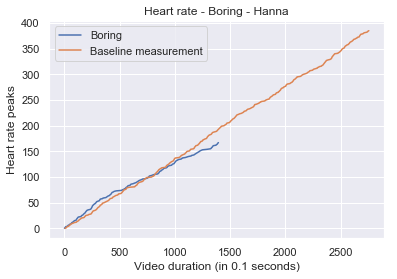

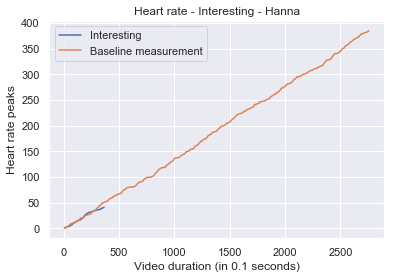

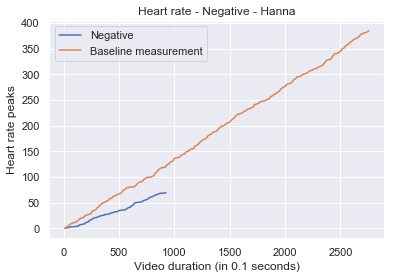

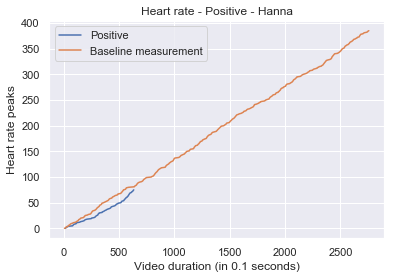

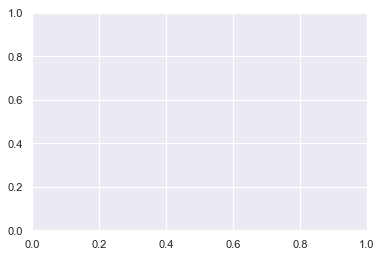

In [398]:
#Create an index so we can loop through the files in peaks_list_hanna. 
index = 0

#Create an index so we can loop through the file names so the right name is shown as the title of the plot.
index_files = 0

#Loop through the DataFrames in peaks_list_hanna
for item in peaks_list_hanna:
    #Create a line plot of the concerned DataFrame.
    sns.lineplot(y = peaks_list_hanna[index].index, x= peaks_list_hanna[index], label =  files[index_files].split(' ')[0]).set(xlabel='Video duration (in 0.1 seconds)', ylabel='Heart rate peaks')
    
    #Create a line plot of the Baseline measurement so we can compare the emotions.
    sns.lineplot(y = peaks_list_hanna[0].index, x= peaks_list_hanna[0], label = 'Baseline measurement').set(xlabel='Video duration (in 0.1 seconds)', ylabel='Heart rate peaks')
    
    #Create the right title, splitted on the . so we can remove the .csv part from the file name.
    plt.title('Heart rate - ' + files[index_files].split('.')[0])
    
    #Create subplots after every iteration of the loop, only two lines are plotted in one chart (The concerned DataFrame + The baseline measurement)
    plt.subplots()
    
    #Add 1 to the index so we iterate through the peaks_list_hanna
    index = index +1
    
    #Add 1 to the index_files so we go to the next name in the file names list.
    index_files = index_files + 2

__Findings__ <br />
What is interesting, is that we can see a more exponential type of graph in the positive emotion compared to the baseline measurement. We can hypothesise that heart rate increases when people experience a positive emotion. The other emotions look like to decrease in heart rate. The positive emotion has a more 'exponential' type of graph. At this moment, we only know that this happens at Hanna's Dataset. It is important to also check if this is the case with Koen's data.

In the code below we run the same script in Koen's data.

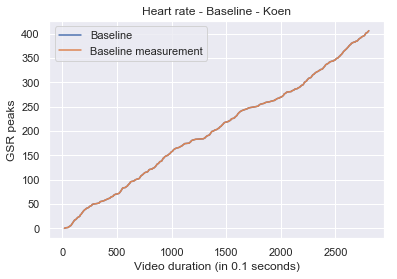

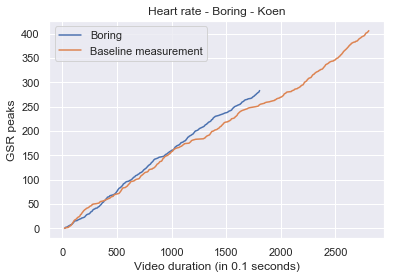

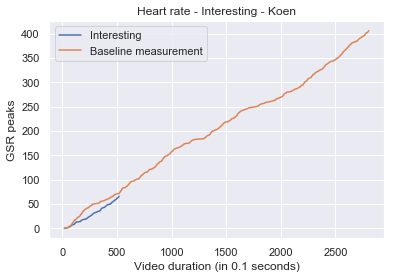

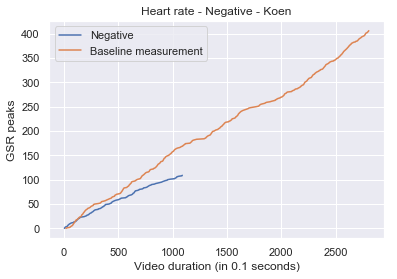

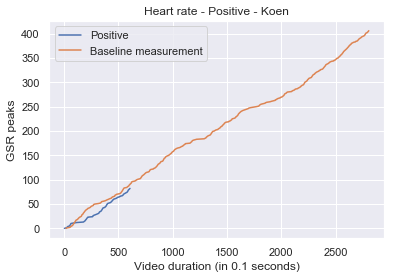

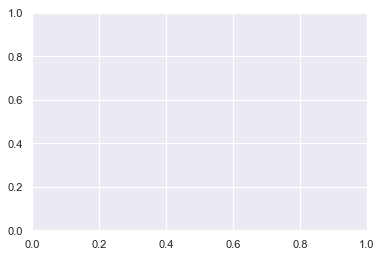

In [399]:
#Create an index so we can loop through the files in peaks_list_hanna. 
index = 0

#Create an index so we can loop through the file names so the right name is shown as the title of the plot.
index_files = 1

#Loop through the DataFrames in peaks_list_hanna
for item in peaks_list_koen:
    #Create a line plot of the concerned DataFrame.
    sns.lineplot(y = peaks_list_koen[index].index, x= peaks_list_koen[index], label =  files[index_files].split(' ')[0]).set(xlabel='Video duration (in 0.1 seconds)', ylabel='GSR peaks')
    
    #Create a line plot of the Baseline measurement so we can compare the emotions.
    sns.lineplot(y = peaks_list_koen[0].index, x= peaks_list_koen[0], label = 'Baseline measurement').set(xlabel='Video duration (in 0.1 seconds)', ylabel='GSR peaks')
    
    #Create the right title, splitted on the . so we can remove the .csv part from the file name.
    plt.title('Heart rate - ' + files[index_files].split('.')[0])
    
    #Create subplots after every iteration of the loop, only two lines are plotted in one chart (The concerned DataFrame + The baseline measurement)
    plt.subplots()
    
    #Add 1 to the index so we iterate through the peaks_list_hanna
    index = index +1
    
    #Add 1 to the index_files so we go to the next name in the file names list.
    index_files = index_files + 2

__Findings__ <br/>
In Hanna's case, the positive emotion resulted in an increasement in  heart rate during the positive video. This also happened with Koen´s positive emotion. It looks like there is a correlation between the positive emotion and the baseline measurement. To speak of causation, we need more data of more persons. In Koen's data we can also see that there is an decreasement in heart rate at other emotions (negative emotion). The interesting emotion has quite the same line as the positive emotions, which is interesting because these emotions go quite well together. The boring and basline line in Koen's case have about the same increasement. This also is an interesting finding, because a boring emotions can be quite the same as the emotion you have when you do nothing (which we did during the baseline measurement).

The findings in Koen's case are quite the same as in Hanna's data. The positive emotions looks the most like a 'exponential' type of graph.

To find out if there is also a change in GSR values, we have to do the same for the GSR peaks as for the heart rate peaks. We will discuss and execute this in the next part of the Notebook. 

## GSR data 
Because we saw an increasement in heart rate during the positive emotion, it is interesting to also check if this is the case with an increasement of sweat. The Galvanic Skin Response (GSR) measured the level of resistance between two points on the hand. The more you sweat, the better the electronic pulses are conducted, the lower the resistance is. With the GSR the resistance is measured, which means that the lower the GSR value, the more the person in case sweats at that moment in time.



_Below we create the same loop as in the heart rate case. For the explanation of the loop, please look at the explanation given at the first heart rate loop. The only difference between this loop and the heart rate loopt, is that the GSR sensor's Series is plotted instead of the heart rate sensor's Series._

The only difference between the two can be the name of the variables used.

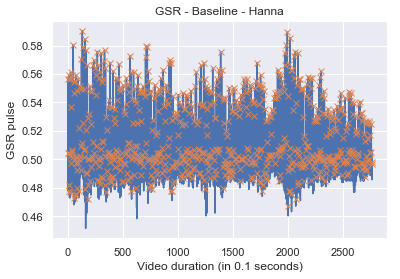

The amount of peaks is: 754
The duration is: 303 seconds
The GSR (bpm) is: 149


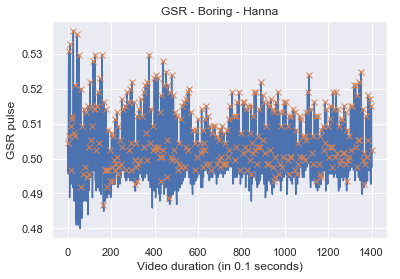

The amount of peaks is: 339
The duration is: 153 seconds
The GSR (bpm) is: 132


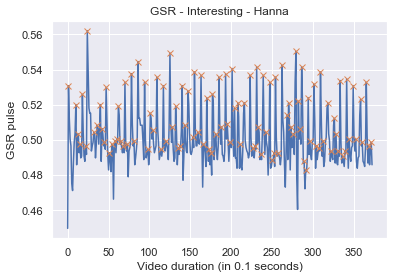

The amount of peaks is: 109
The duration is: 41 seconds
The GSR (bpm) is: 159


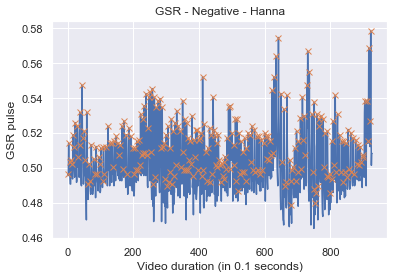

The amount of peaks is: 269
The duration is: 101 seconds
The GSR (bpm) is: 159


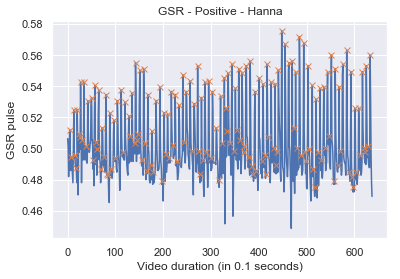

The amount of peaks is: 162
The duration is: 70 seconds
The GSR (bpm) is: 138


In [400]:
#Create an empty list to store the GSR peaks from Hanna's data
peaks_list_hanna_gsr = []

#Here we create an index to loop through the files list. In this file every even number is hanna's Dataframe. This way we can generate a Title for the plot automatically. (See the plt.title line in the loop below.)
index_files = 0

#Every item in dfs_hanna is a DataFrame containing all the data from Hanna with different emotions. 
for item in dfs_hanna:
    #x is the data of the heart rate series of the item(the DataFrame based on the for- loop)
    x = item['GSR']
    #item['x'] = item['Heart rate']
    #Here we use the find_peaks function to find the peaks. The height is being set to 0.4 because all of the heart rate data has no pulse below 0.4. 
    #The distance is set to 1, because after trying different distances, this came out working best. This is based on the calculation of the heart rate which should be above at least 40 for every plot.
    peaks, _ = find_peaks(x, height=0.4, distance = 1)
    
    #plot x
    plt.plot(x)
    #plot the peaks
    plt.plot(peaks, x[peaks], "x", label = item)
    #Because we do not define plt.subplots(), the plots are plotted on top of each other. This way we can see if the peaks are right and do not skip certain points in the plot. This way we know the settings are right.
    plt.title('GSR - ' + files[index_files].split('.')[0])
    plt.xlabel('Video duration (in 0.1 seconds)')
    plt.ylabel('GSR pulse')
    plt.show()
    
    #Print the amount of peaks
    print("The amount of peaks is: " + str(len(peaks)))
    
    #Define variables for the beginning and ending of the 'Date time' series. 
    #[0] = the first row
    #[-1] = the last row
    beginning = item['Date time'][0]
    end = item.iloc[-1]['Date time']

        #Duration = the last 'Date time' value minus the first 'Date time value'
    duration = end - beginning
    
    #Convert the duration into seconds
    duration = int(duration.total_seconds())
        
    #Heart rate is calculating by dividing the amount of peaks by the duration and multiplying this by 60 (because 60 is the amount of seconds in a minute)
    GSR =  len(peaks) / duration* 60
    GSR = int(GSR)
    
    print("The duration is: " + str(duration) + ' seconds')
    print(f'The GSR (bpm) is: {GSR}')
    
    #Because we want to plot the peaks individually, we have to add the list with peaks to the peaks_list_hanna. 
    peaks = peaks.tolist()
    peaks_list_hanna_gsr.append(peaks)
    
    #Add 2 to the index_files, so the title of the plot will be the right one (the one after the next).
    index_files = index_files + 2   
    

__Findings__ <br/>
Based on this data it is hard to draw a conclusion. We will run the same script as ran above on Koen's dataset and will plot the peaks from Hanna and Koen of the GSR data afterwards. In the GSR peaks plots, we will probably find more interesting findings.

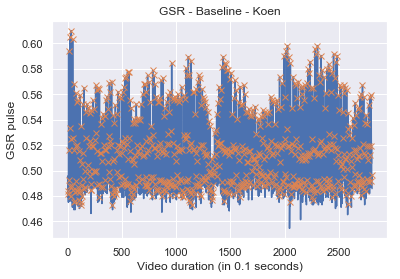

The amount of peaks is: 767
The duration is: 308 seconds
The GSR (bpm) is: 75


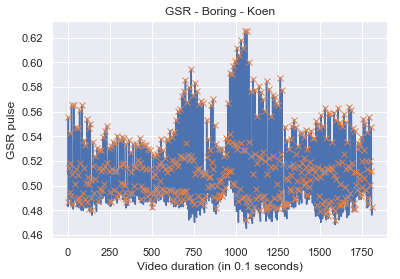

The amount of peaks is: 492
The duration is: 198 seconds
The GSR (bpm) is: 75


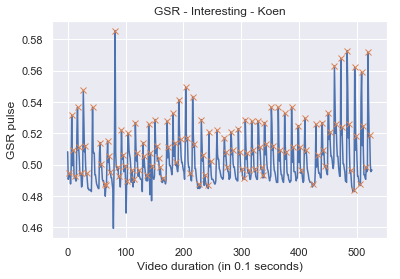

The amount of peaks is: 120
The duration is: 58 seconds
The GSR (bpm) is: 75


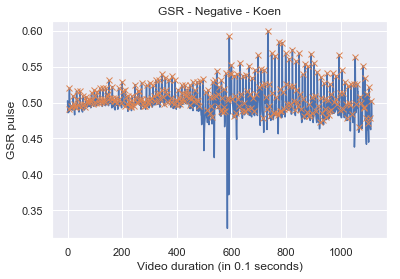

The amount of peaks is: 313
The duration is: 122 seconds
The GSR (bpm) is: 75


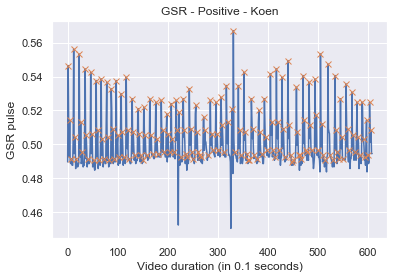

The amount of peaks is: 173
The duration is: 66 seconds
The GSR (bpm) is: 75


In [401]:
#Create an empty list where the GSR peaks of Koen's dataset can be stored
peaks_list_koen_gsr = []

#Here we create an index to loop through the files list. In this file every even number is hanna's Dataframe. This way we can generate a Title for the plot automatically. (See the plt.title line in the loop below.)
index_files = 1

index = 0

#Every item in dfs_hanna is a DataFrame containing all the data from Hanna with different emotions. 
for item in dfs_koen:
    #x is the data of the heart rate series of the item(the DataFrame based on the for- loop)
    x = item['GSR']
    #item['x'] = item['Heart rate']
    #Here we use the find_peaks function to find the peaks. The height is being set to 0.4 because all of the heart rate data has no pulse below 0.4. 
    #The distance is set to 1, because after trying different distances, this came out working best. This is based on the calculation of the heart rate which should be above at least 40 for every plot.
    peaks, _ = find_peaks(x, height=0.4, distance = 1)
    
    #plot x
    plt.plot(x)
    #plot the peaks
    plt.plot(peaks, x[peaks], "x", label = item)
    #Because we do not define plt.subplots(), the plots are plotted on top of each other. This way we can see if the peaks are right and do not skip certain points in the plot. This way we know the settings are right.
    plt.title('GSR - ' + files[index_files].split('.')[0])
    plt.xlabel('Video duration (in 0.1 seconds)')
    plt.ylabel('GSR pulse')
    plt.show()
    
    #Print the amount of peaks
    print("The amount of peaks is: " + str(len(peaks)))
    
    #Define variables for the beginning and ending of the 'Date time' series. 
    #[0] = the first row
    #[-1] = the last row
    beginning = item['Date time'][0]
    end = item.iloc[-1]['Date time']

        #Duration = the last 'Date time' value minus the first 'Date time value'
    duration = end - beginning
    
    #Convert the duration into seconds
    duration = int(duration.total_seconds())
        
    #Heart rate is calculating by dividing the amount of peaks by the duration and multiplying this by 60 (because 60 is the amount of seconds in a minute)
    GSR =  len(peaks) / duration* 60
    GSR = int(heartrate)
    
    print("The duration is: " + str(duration) + ' seconds')
    print(f'The GSR (bpm) is: {GSR}')
    
    #Because we want to plot the peaks individually, we have to add the list with peaks to the peaks_list_koen. 
    peaks = peaks.tolist()
    peaks_list_koen_gsr.append(peaks)
    
    #Add 2 to the index_files, so the title of the plot will be the right one (the one after the next).
    index_files = index_files + 2
    
    

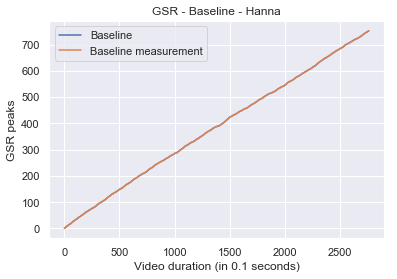

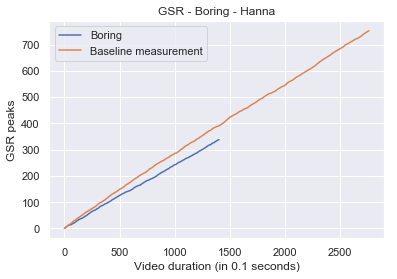

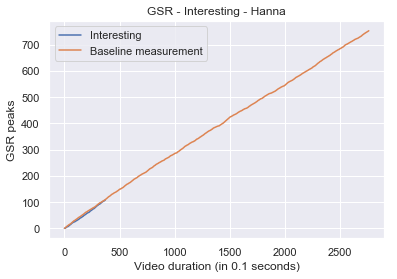

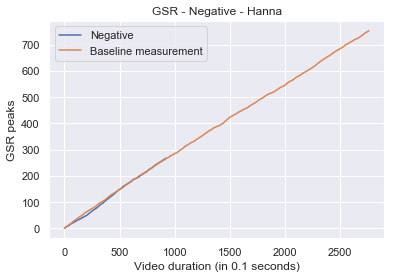

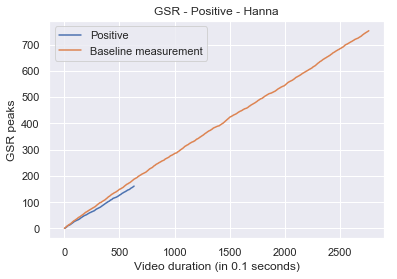

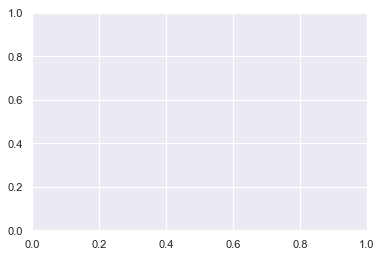

In [402]:
peaks_list_hanna_gsr = pd.DataFrame(peaks_list_hanna_gsr)
peaks_list_hanna_gsr = peaks_list_hanna_gsr.transpose()

index_files = 0

#Create an index so we can iterate through te peaks_list_hanna_gsr
index = 0

for item in peaks_list_hanna_gsr:
    #Create a line plot of the concerned DataFrame.
    sns.lineplot(y = peaks_list_hanna_gsr[index].index, x= peaks_list_hanna_gsr[index], label =  files[index_files].split(' ')[0]).set(xlabel='Video duration (in 0.1 seconds)', ylabel='GSR peaks')
    
    #Create a line plot of the Baseline measurement so we can compare the emotions.
    sns.lineplot(y = peaks_list_hanna_gsr[0].index, x= peaks_list_hanna_gsr[0], label = 'Baseline measurement').set(xlabel='Video duration (in 0.1 seconds)', ylabel='GSR peaks')
    
    #Create the right title, splitted on the . so we can remove the .csv part from the file name.
    plt.title('GSR - ' + files[index_files].split('.')[0])
    
    #Create subplots after every iteration of the loop, only two lines are plotted in one chart (The concerned DataFrame + The baseline measurement)
    plt.subplots()
    
    #Add 1 to the index so we iterate through the peaks_list_hanna
    index = index +1
    
    #Add 1 to the index_files so we go to the next name in the file names list.
    index_files = index_files + 2

## Observing Hanna's GSR plots
Based on Hanna's plots, we can see the 'positive' and 'boring' emotion are lower in increasement during the video than the baseline and other emotions. This is not what we would like to see, because this implies that when you are bored, you start to sweat more. We hypothesized that there would be an increasement in GSR when you are more aroused or have a more stronger emotion like 'negative' or 'positive'. The lower the resistance the more you sweat. Based on this finding we will run the same script as ran above on Koen's GSR data to check if there is a correlation between the positive emotion and the baseline measurement.

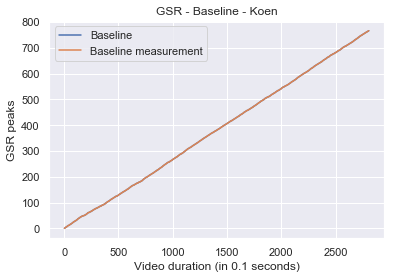

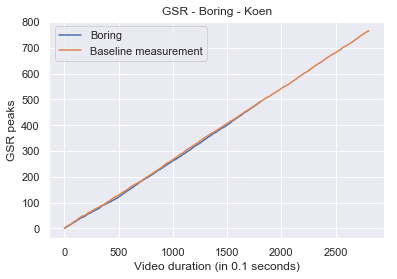

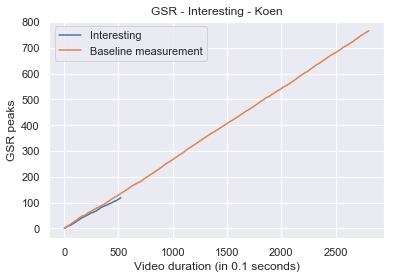

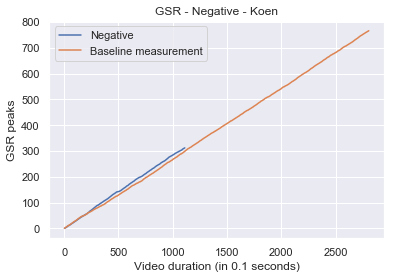

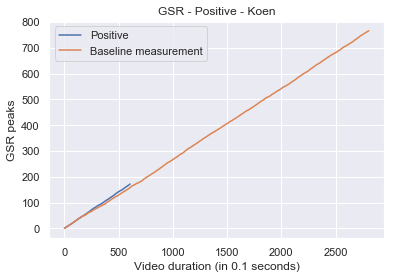

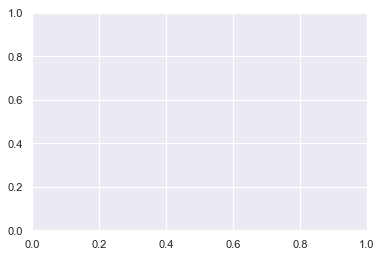

In [403]:
#Earlier the peaks_list_koen_gsr is generated. Here we transform the list to a DataFrame.
peaks_list_koen_gsr = pd.DataFrame(peaks_list_koen_gsr)

#Here we transpose the DataFrame. This means that the columns and rows are swapped.
peaks_list_koen_gsr = peaks_list_koen_gsr.transpose()

#Create a variabe which iterates through the files variable. all odd numbers are Koen's df's, so start with 1 and add 2 every iteration in the for-loop.
index_files = 1

index = 0

for item in peaks_list_koen_gsr:
    #Create a line plot of the concerned DataFrame.
    sns.lineplot(y = peaks_list_koen_gsr[index].index, x= peaks_list_koen_gsr[index], label =  files[index_files].split(' ')[0]).set(xlabel='Video duration (in 0.1 seconds)', ylabel='GSR peaks')
    
    #Create a line plot of the Baseline measurement so we can compare the emotions.
    sns.lineplot(y = peaks_list_koen_gsr[0].index, x= peaks_list_koen_gsr[0], label = 'Baseline measurement').set(xlabel='Video duration (in 0.1 seconds)', ylabel='GSR peaks')
    
    #Create the right title, splitted on the . so we can remove the .csv part from the file name.
    plt.title('GSR - ' + files[index_files].split('.')[0])
    
    #Create subplots after every iteration of the loop, only two lines are plotted in one chart (The concerned DataFrame + The baseline measurement)
    plt.subplots()
    
    #Add 1 to the index so we iterate through the peaks_list_koen
    index = index +1
    
    #Add 1 to the index_files so we go to the next name in the file names list.
    index_files = index_files + 2

## Observing Koen's GSR plots
In Hanna's plots we saw a difference between the positive and interesting emotions and the baseline measurement. In Koen's GSR data, this is not the case. Unfortunately we cannot say there is a positive correlation in the GSR data between the positive and bored emotion and the baseline measurement.

## Conclusion
Based on our biofeedback data we investigated if we could see any difference in increasement between the heart rate and GSR during different emotions. Based on the heart rate data, we can say that there might be a correlation between heart rate and having a positive emotion. There might also be a relationship between an increasement in heart rate versus other emotions. We cannot draw hard conclusions based on this data, we can only hypothesise.

The same goes for the GSR data. We can only hypothesise that there are certain relationships as mentioned earlier. We need more data to be able to draw conclusions and test our hypotheses regarding an increasement in heart rate or gsr pulses during having a certain emotion. Next to having too little data, we need more reliable sensors. The sensors we used from Sensor Lab do work, but not properly enough to help us find the right answers to our questions related to biofeedback in relation to emotions. Further research has to be done to give more insights in the relation between heart rate and emotions, and GSR and emotions.